In [3]:
##Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import sklearn
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [4]:
# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

Generic Functions
As we require to EDA for indepedent variables and depedent variable , lets create few generic methods which can be reused.`

In [5]:
## create generic function to plot categorical variable 
def plot_bar_categorial_percentage(data,column):
    ab = pd.DataFrame((data[column].value_counts(normalize=True)*100).round(0).sort_values())
    ab.reset_index(inplace=True)
    ab1 = sns.barplot(x='index',y=column, data=ab, palette='Set1')
        
    plt.setp(ab1.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.xlabel(column, fontsize= 14, fontstyle='italic')
    plt.ylabel('Frequency(%count of total)', fontsize= 14, fontstyle='italic')
    plt.title(column+' Analysis', fontsize=16, fontweight='bold')
    plt.grid(True)
        
    for i in ab1.patches:
        ab1.annotate(format(i.get_height())+"%", (i.get_x() + i.get_width() / 2.\
                                                         , i.get_height()), ha = 'center'\
                , va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation=45, fontsize=11)
        

In [6]:
def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

In [7]:
## for better reading and DRY
def show_plot(plt):
    plt.grid(True)
    plt.tight_layout()
    plt.autoscale()
    plt.show()

In [8]:
## for better reading and DRY
def show_box_plot(plt,data,field):
    plt.figure(figsize=(20, 12))
    plt.subplot(2,4,1)
    sns.boxplot(x=data[field])

    plt.show()

In [9]:
def get_num_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    num_cols = df1.select_dtypes(include=['int64','float64','int32','float32'])
    for col in (num_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

In [10]:
def scatter_plt(data,column1,column2,column3,target,subp):
    plt.figure(figsize=(15,5), dpi=150)
    sns.set_style("white")
    #subplot (131)
    if subp == 3:
        x=1
        y=3
        z=1
    elif subp ==2:
        x=1
        y=2
        z=1
    plt.subplot(x,y,z)
    plt.scatter(x= data[column1], y= df[target])
    plt.title((target + " vs "+ column1), fontweight='bold', fontsize=15)
    plt.xlabel(column1, fontsize=13, fontstyle='italic')
    plt.ylabel(target, fontsize=13, fontstyle='italic')
    plt.grid(True)
    z = z+1
    #subplot (132)
    plt.subplot(x,y,z)
    plt.scatter(x= data[column2], y= df[target])
    plt.title((target + " vs "+ column2), fontweight='bold', fontsize=15)
    plt.xlabel(column2, fontsize=13, fontstyle='italic')
    plt.ylabel(target, fontsize=13, fontstyle='italic')
    plt.grid(True)
    #subplot (133)
    if z != y:
        z = z+1
        plt.subplot(x,y,z)
        plt.scatter(x= data[column3], y= df[target])
        plt.title((target + " vs "+ column3), fontweight='bold', fontsize=15)
        plt.xlabel(column2, fontsize=13, fontstyle='italic')
        plt.ylabel(target, fontsize=13, fontstyle='italic')
        plt.grid(True)
    
    plt.autoscale()
    plt.tight_layout()
    plt.show()

In [11]:
def create_dummies(data,list_column,prefix1):
    s = []
    #this FOR loop is purely for creating and storing the dynamic variable names in s
    for x in range(1,len(orig_before_dum_cols),+1):
        s.append(prefix1 + str(list_column[x]))
    for i in s:
        i = pd.get_dummies(data[i[3:]], prefix= i, drop_first = True)
        data = pd.concat([data, i], axis = 1)
    return data

In [12]:
def create_resd_qqplot(data,target,title):
    ##tranforming the target variable 'SalePrice' using Log-Transform. SalePrice Distribution (After Log-Transformation)

    from scipy import stats
    from scipy.stats import norm

##lets  apply log(1+x) to all elements of the target variable column
    data[target] = np.log1p(data[target])

    plt.figure(figsize=(6,8), dpi=100)
    plt.subplot(211)
    sns.distplot(data[target], fit=norm)

    (mu, sigma) = norm.fit(data[target])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency', fontsize=10)
    plt.title(title, fontsize=14, fontweight='bold')

    plt.subplot(212)
    res = stats.probplot(data[target], plot=plt)

    plt.autoscale()
    plt.tight_layout()
    plt.show()

In [13]:
def create_scatter_plt_test_pred(y_test_val,y_pred_test_val,title,xlabel,ylabel):
    sns.set_style('white')
    fig = plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(y_test_val,y_pred_test_val)
    fig.suptitle(title, fontsize=18)             
    plt.xlabel(xlabel, fontsize=14)                       
    plt.ylabel(ylabel, fontsize=14)  
    plt.grid(True)
    plt.show()

In [14]:
def create_plt_act_pred(y_train_val,y_pred_train_val,y_train_series,y_pred_train_series,title,xlabel,ylabel):
    sns.set_style('white')
    plt.figure(figsize = (10,4), dpi=120)
    plt.plot(y_train_series, y_pred_train_val, color="blue", linewidth=1, linestyle="-")     #Predicted 'y_pred_train_r' plot
    plt.plot(y_pred_train_series, y_train, color="red",  linewidth=1, linestyle="-")  #Actual 'y_train' plot
    plt.title(title, fontsize=15, fontweight='bold')    
    plt.xlabel(xlabel, fontsize=15, fontstyle='italic')                              
    plt.ylabel(ylabel, fontsize=15, fontstyle='italic')  
    plt.show()

In [15]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(data):
    df_1 = data.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

In [16]:
def create_box_plot(data,column1,column2,column3):
    plt.figure(figsize=(20, 12))
    plt.subplot(2,4,1)
    sns.boxplot(x=data[column1])

    plt.subplot(2,4,2)
    sns.boxplot(x=data[column1])

    plt.subplot(2,4,3)
    sns.boxplot(x=data[column1])


    plt.show()

## Reading the data 

In [17]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\I066565\Desktop\New folder\telecom-churn-case-study-hackathon-isap\train.csv')


In [18]:
#display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [19]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [20]:
#describe the data
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [21]:
#check the columns of data
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [22]:
#info about the column types etc. 
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [23]:
#check the size of data
df.size

12039828

# Cleaning of data

## Check for Duplicates

In [24]:
# Checking for the duplicates
df.drop_duplicates(subset=None, inplace=True)
df.shape

(69999, 172)

## Handling missing values

In [25]:
##check null values and percentage
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

,0
loc_og_t2o_mou,1.00
std_og_t2o_mou,1.00
loc_ic_t2o_mou,1.00
last_date_of_month_7,0.57
last_date_of_month_8,1.05
...,...
night_pck_user_7,74.48
night_pck_user_8,73.69
fb_user_6,74.90
fb_user_7,74.48


In [26]:
missing_values = round((df.isnull().sum()/len(df.id))*100, 2) 
print(missing_values)

id                   0.0
circle_id            0.0
loc_og_t2o_mou       1.0
std_og_t2o_mou       1.0
loc_ic_t2o_mou       1.0
                    ... 
aon                  0.0
aug_vbc_3g           0.0
jul_vbc_3g           0.0
jun_vbc_3g           0.0
churn_probability    0.0
Length: 172, dtype: float64


## Handling Null values

In [27]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [28]:
# remove columns with missing values > 70
columns_with_missing_values = list(missing_values[missing_values >=70].index)
print(columns_with_missing_values)

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [29]:
df = df.drop(columns_with_missing_values,axis=1)
df.shape

(69999, 142)

In [30]:
df.nunique().sort_values()

std_ic_t2o_mou_7        1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
                    ...  
total_og_mou_7      33195
arpu_8              60194
arpu_7              61425
arpu_6              61615
id                  69999
Length: 142, dtype: int64

In [31]:
##check if any null values in categorical column

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]

In [32]:
missing_cat_obj_null_prcnt

last_date_of_month_7    0.57
last_date_of_month_8    1.05
date_of_last_rech_6     1.57
date_of_last_rech_7     1.76
date_of_last_rech_8     3.52
dtype: float64

In [33]:
## as it is categorical variable and have some meaningful information as per data dictionary , lets fill as of now None 

cat_null_obj_cols = [ 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 
            'date_of_last_rech_8']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [34]:
##check null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [35]:
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

Number of categorical object type columns removed:  3 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [36]:
##rechecking null values in the categorical columns

cat_obj_null_cols = df.select_dtypes(include='object')  
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [37]:
##creating a dataframe 'df_obj_cat' with object type categorical variables 
obj_type_cat = df.select_dtypes(include='object').columns
df_obj_cat = df.loc[:,obj_type_cat]
df_obj_cat.head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


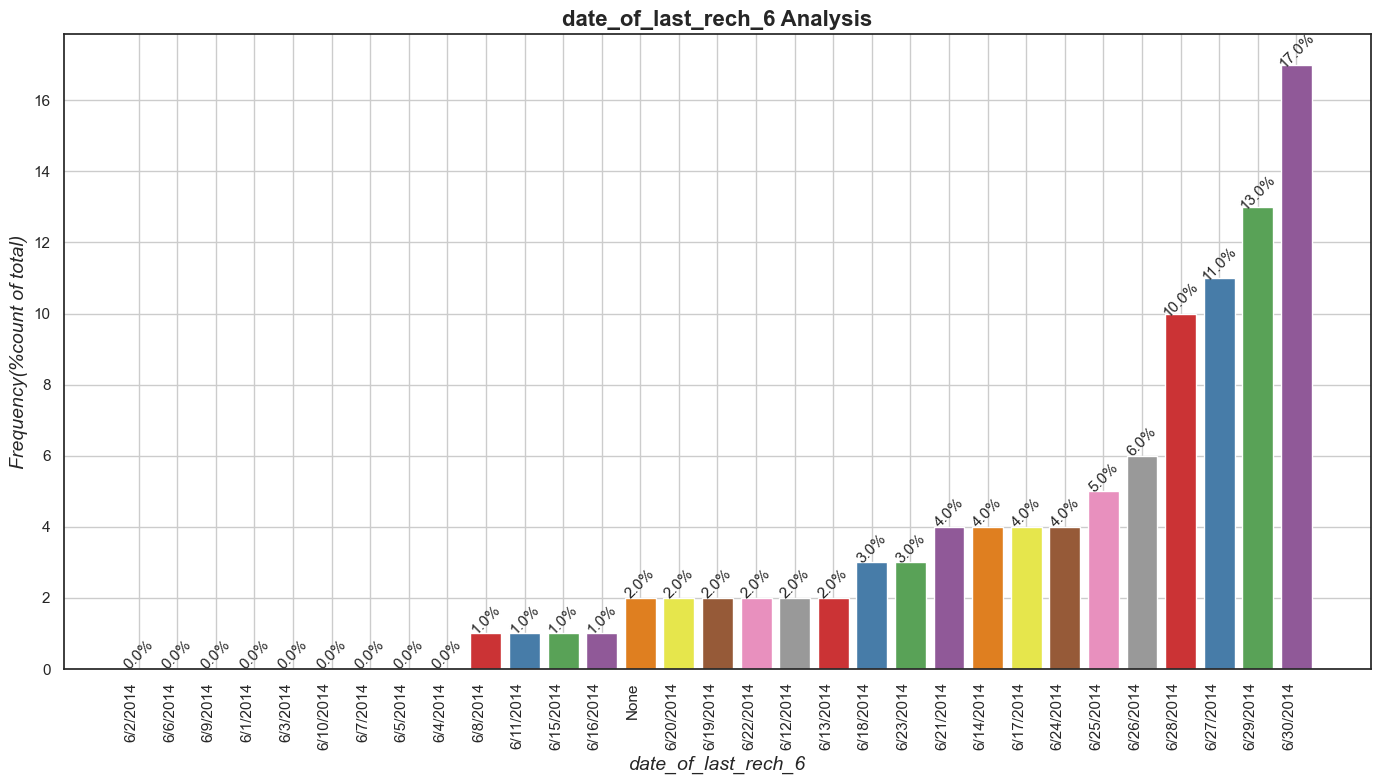

The highest % in  date_of_last_rech_6 category is  [17.0]


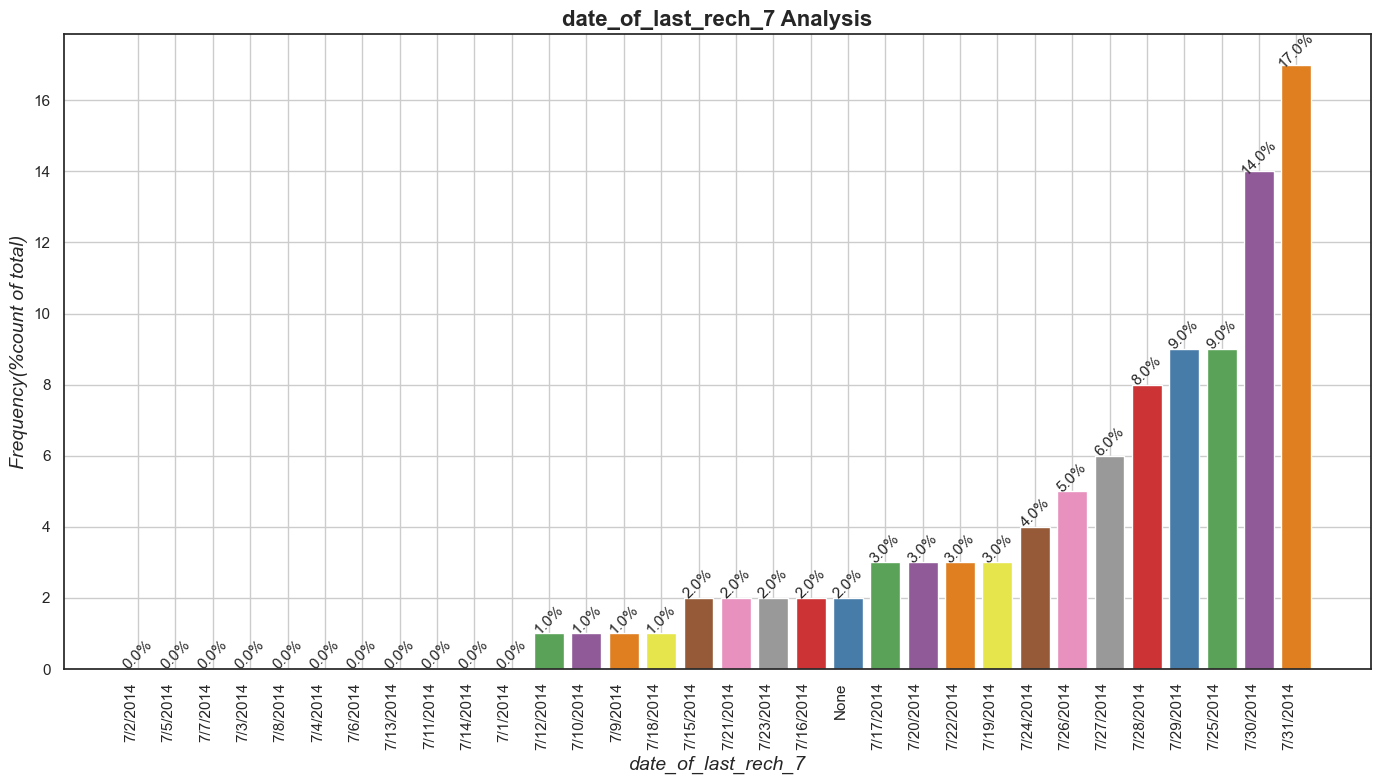

The highest % in  date_of_last_rech_7 category is  [17.0]


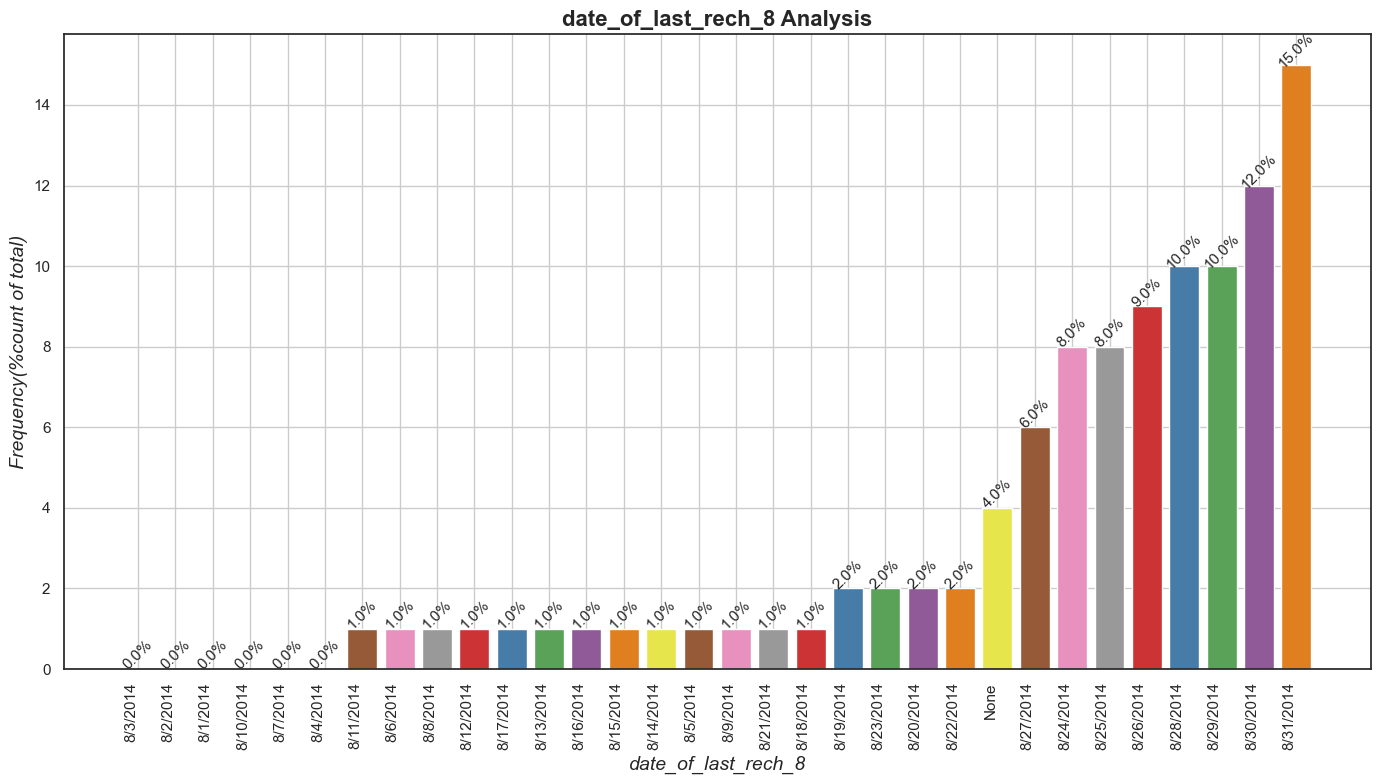

The highest % in  date_of_last_rech_8 category is  [15.0]


In [38]:
for i in range(0,len(df_obj_cat.columns),1):
    sns.set(style='white')
    plt.figure(figsize=(14, 8), dpi=100)
    plot_bar_categorial_percentage(df,df_obj_cat.columns[i])
    show_plot(plt)
    ab = pd.DataFrame((df[df_obj_cat.columns[i]].value_counts(normalize=True)*100).round(0).sort_values())
    text = ab.values.tolist()[-1]
    print('The highest % in  '+ df_obj_cat.columns[i] +' category is  ' + str(text))

In [39]:
##checking  null values in the numeric columns.

numeric_null_cols = df.select_dtypes(include=['int64','float64','int32','float32'])   #Retaining only int and float data types for numeric columns
missing_numeric_null_prcnt = round(100*numeric_null_cols.isnull().sum()/len(numeric_null_cols.index),2)
missing_numeric_null_prcnt = missing_numeric_null_prcnt[missing_numeric_null_prcnt!=0]
missing_numeric_null_prcnt

loc_og_t2o_mou    1.00
std_og_t2o_mou    1.00
loc_ic_t2o_mou    1.00
onnet_mou_6       3.95
onnet_mou_7       3.84
                  ... 
isd_ic_mou_7      3.84
isd_ic_mou_8      5.29
ic_others_6       3.95
ic_others_7       3.84
ic_others_8       5.29
Length: 90, dtype: float64

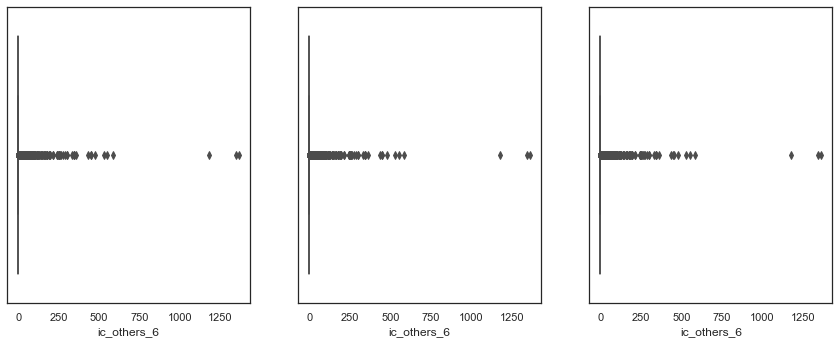

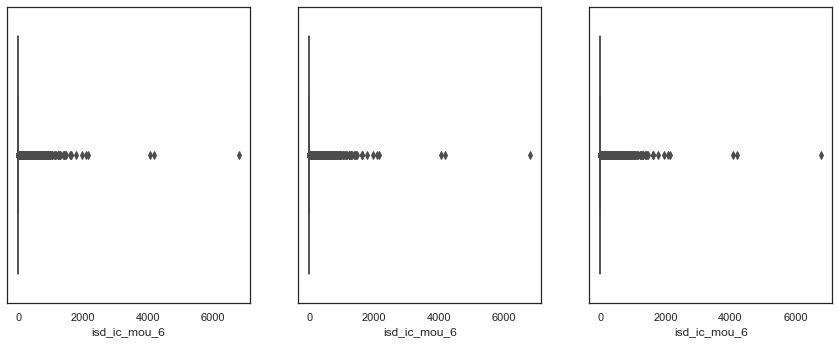

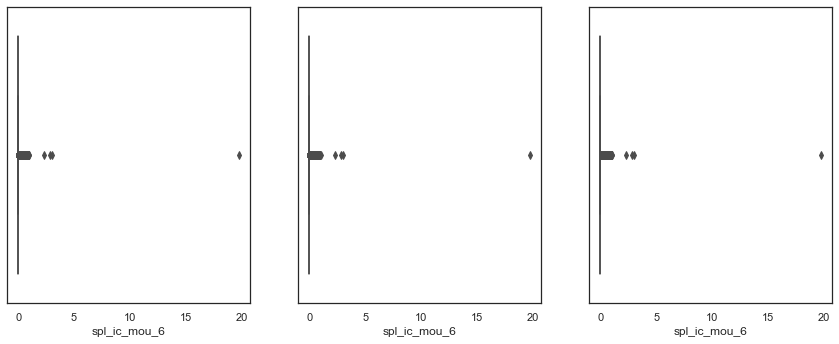

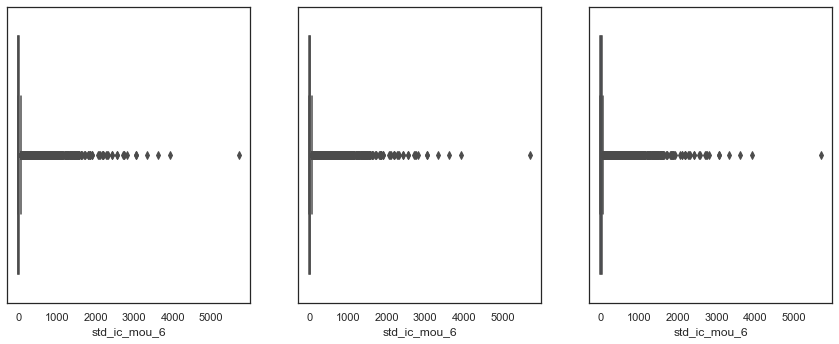

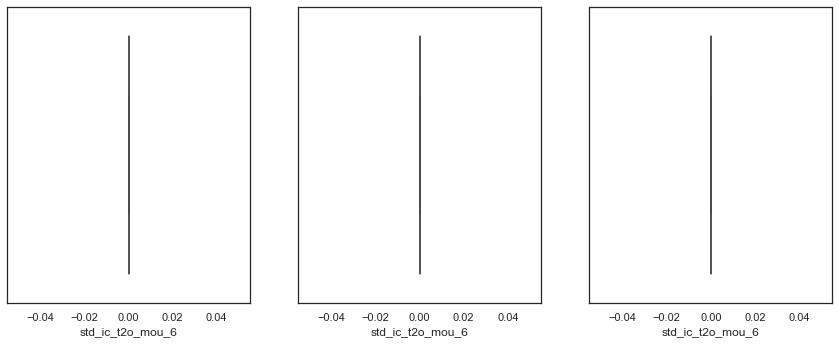

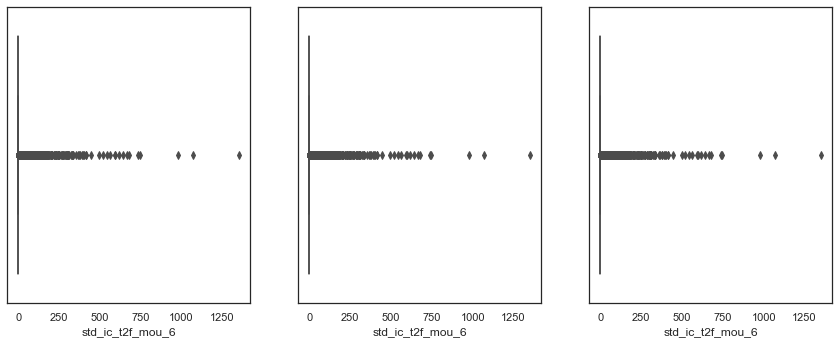

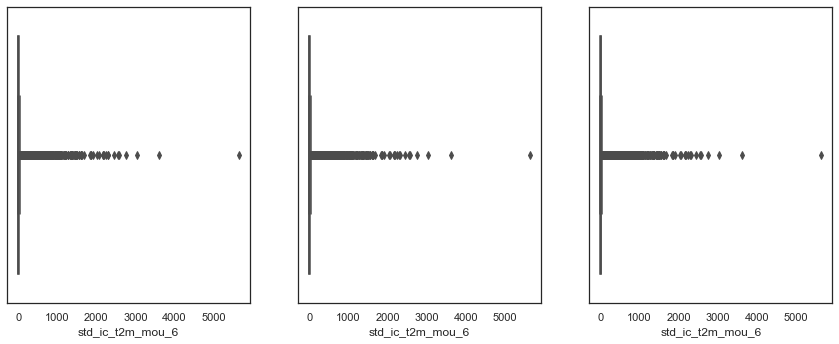

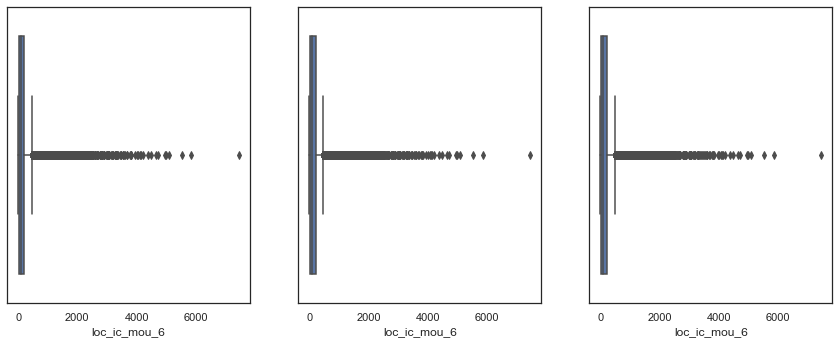

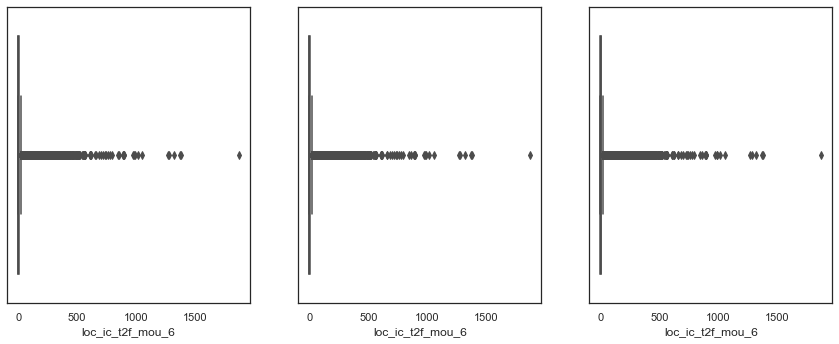

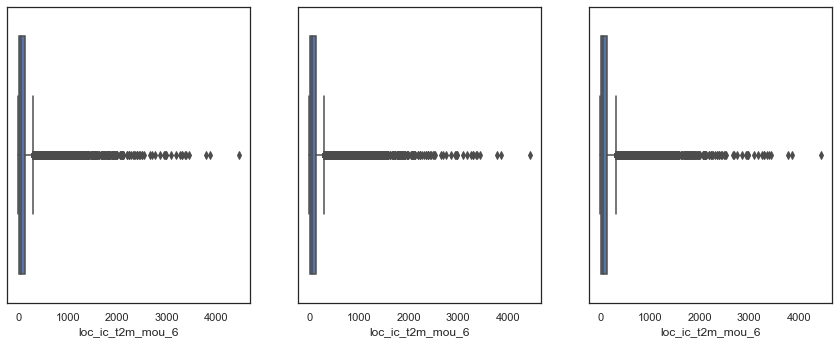

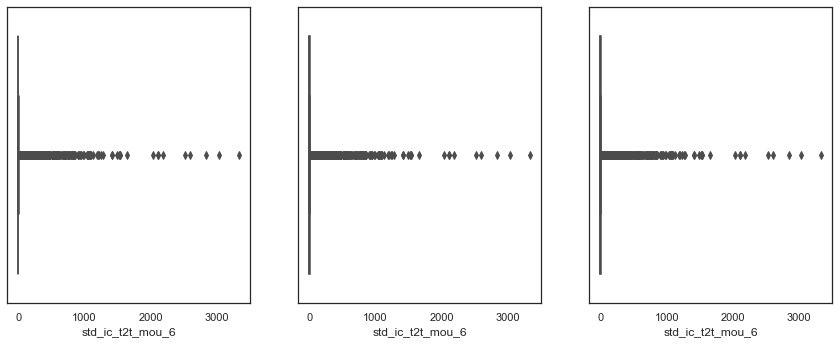

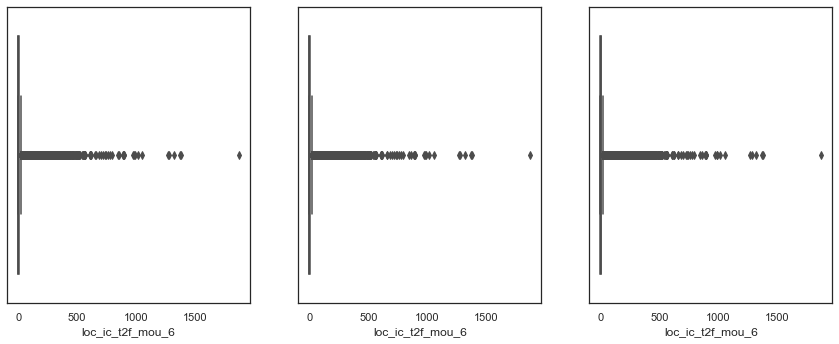

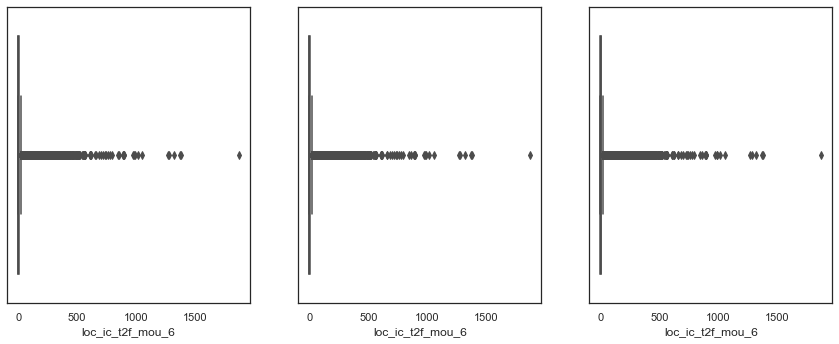

In [40]:
create_box_plot(df,"ic_others_6","ic_others_7","ic_others_8")
create_box_plot(df,"isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8")
create_box_plot(df,"spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8")
create_box_plot(df,"std_ic_mou_6","std_ic_mou_7","std_ic_mou_8")
create_box_plot(df,"std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8")
create_box_plot(df,"std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8")
create_box_plot(df,"std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8")
create_box_plot(df,"loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8")
create_box_plot(df,"loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8")
create_box_plot(df,"loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8")
create_box_plot(df,"std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8")
create_box_plot(df,"loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8")
create_box_plot(df,"loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8")

In [41]:
#shape of the data
df.shape

(69999, 139)

In [42]:
# Checking for null values
df.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 139, dtype: int64

## Deleting unnecessary columns

In [43]:
##Dropping columns that have only one unique value. Hence there will be no impact of this column on the data analysis.
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',  
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
df = df.drop(drop_col_with_unique_col, axis=1)

In [44]:
## Deleting the date columns as the date columns are not required in our analysis
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [45]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

In [46]:
df.shape

(69999, 126)

In [47]:
# Checking for null values
df.isnull().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6          2768
                     ... 
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
churn_probability       0
Length: 126, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Columns: 126 entries, id to churn_probability
dtypes: float64(99), int64(27)
memory usage: 67.8 MB


# Data Preparation

Based on the data analysis, we can make the following inference. There are two phases of customers: 

- The ‘good & action’ phase which is between Month 6 & 7
- The ‘churn’ phase that lies in Month 8. 


In this case, since we are working over a three-month window, the first two months are the ‘good & action’ phase, the third month is the ‘churn’ phase.

## Filtering High Value Customers

Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [49]:
#Deriving Average recharge amount of June and July.
df['Average_rech_amt_6n7']=(df['total_rech_amt_6']+ df['total_rech_amt_7'])/2

In [50]:
#Filtering HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
df = df[(df['Average_rech_amt_6n7']>= df['Average_rech_amt_6n7'].quantile(0.7))]

In [51]:
df.shape

(21018, 127)

In [52]:
df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Average_rech_amt_6n7
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0


In [53]:
# delete variables created to filter high-value customers
df = df.drop(['total_rech_amt_6', 'total_rech_amt_7'], axis=1)

In [54]:
df.shape

(21018, 125)

Now we are left with 21018 rows and 140 columns after selecting the customers who have a recharge value of more than or equal to 70th percentile cusotmer. 

## Churn analysis

In [55]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21018 non-null  float64
 1   total_og_mou_8  21018 non-null  float64
 2   vol_2g_mb_8     21018 non-null  float64
 3   vol_3g_mb_8     21018 non-null  float64
dtypes: float64(4)
memory usage: 821.0 KB


In [56]:
df.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability',
       'Average_rech_amt_6n7'],
      dtype='object', length=125)

0    91.1552
1     8.8448
Name: churn_probability, dtype: float64


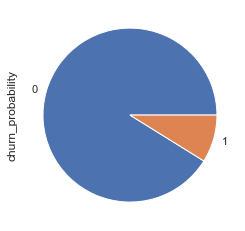

In [57]:
# lets find out churn/non churn percentage
print((df['churn_probability'].value_counts()/len(df))*100)
((df['churn_probability'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

From the above, we can infer that based on the data set, less than 10 percent of the customers would chrun and rest do not. 

There is definitely an imbalance here, which we need to handle. We will first perform the EDA and then before going in for Modelling, we will handle the imbalance. 

# EDA

## Deriving new variables to understand the data¶

In [58]:
# creating a new variable 'tenure'
df['tenure'] = (df['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
df.drop('aon',axis=1, inplace=True)

C:\Users\I066565\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


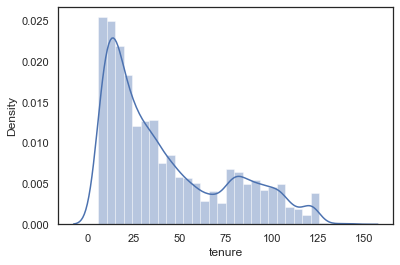

In [59]:
# Checking the distribution of he tenure variable

sns.distplot(df['tenure'],bins=30)
plt.show()

In [60]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels=tn_label)
df['tenure_range'].head()

12    6-12 Months
15        1-2 Yrs
23        1-2 Yrs
24        2-5 Yrs
25            NaN
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

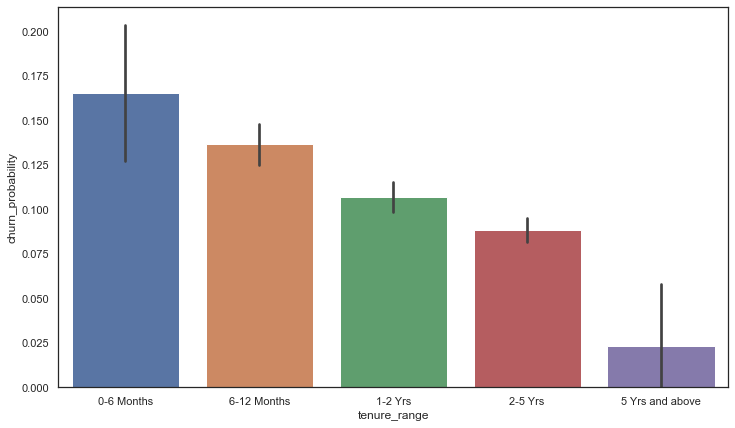

In [128]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=df)
plt.show()

The maximum churn happens within 6 months and later on it reduces. 


In [61]:
#let us create a new field for the average of 6 and 7 months revenuew 

df["avg_arpu_6_7"]= (df['arpu_6']+df['arpu_7'])/2
df['avg_arpu_6_7'].head()

12     418.9325
15     478.9215
23    1018.2270
24     362.0215
25     342.3570
Name: avg_arpu_6_7, dtype: float64

In [62]:
df.shape

(21018, 127)

C:\Users\I066565\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


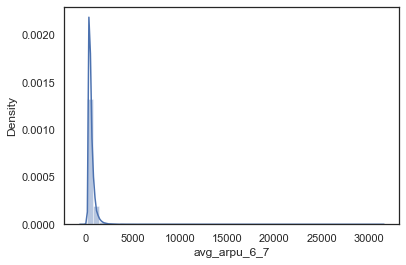

In [63]:
# Visualizing the column created
sns.distplot(df['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

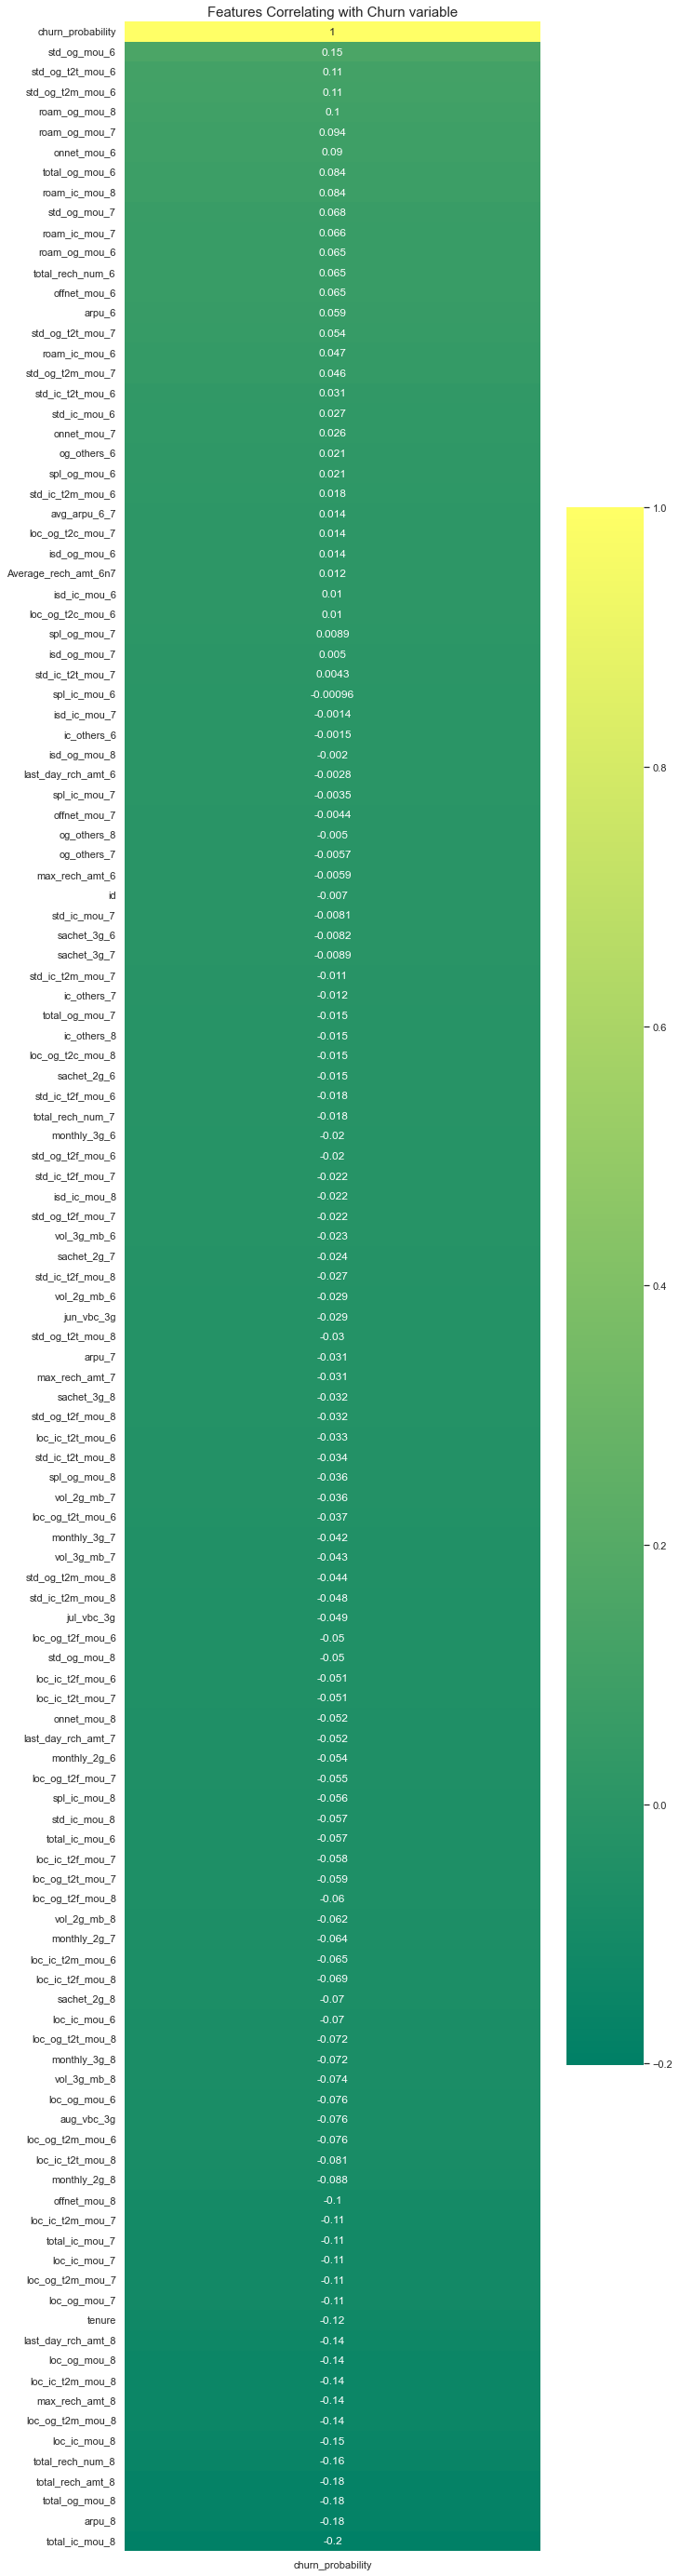

In [132]:
# checking the correlation
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


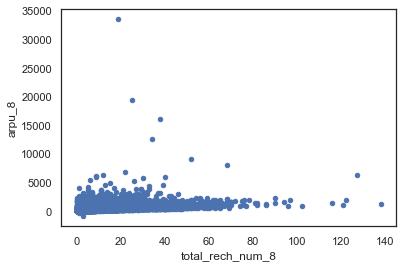

In [133]:
##lets see the relationship between recharge and churn

##recharge and average revenue for 8 months

df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

It is clear that as the recharge rate increases, the churn probability reduces

In [64]:
df.shape

(21018, 127)

In [65]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21018 entries, 12 to 69996
Data columns (total 127 columns):
 #    Column                Dtype   
---   ------                -----   
 0    id                    int64   
 1    arpu_6                float64 
 2    arpu_7                float64 
 3    arpu_8                float64 
 4    onnet_mou_6           float64 
 5    onnet_mou_7           float64 
 6    onnet_mou_8           float64 
 7    offnet_mou_6          float64 
 8    offnet_mou_7          float64 
 9    offnet_mou_8          float64 
 10   roam_ic_mou_6         float64 
 11   roam_ic_mou_7         float64 
 12   roam_ic_mou_8         float64 
 13   roam_og_mou_6         float64 
 14   roam_og_mou_7         float64 
 15   roam_og_mou_8         float64 
 16   loc_og_t2t_mou_6      float64 
 17   loc_og_t2t_mou_7      float64 
 18   loc_og_t2t_mou_8      float64 
 19   loc_og_t2m_mou_6      float64 
 20   loc_og_t2m_mou_7      float64 
 21   loc_og_t2m_mou_8      float64 
 

In [73]:
df = df.drop(["tenure_range" ], axis=1)


In [74]:
print(df.shape)

(21018, 126)


In [75]:
df = df.drop([ "og_others_6",
 "og_others_7",
 "og_others_8",
 "loc_ic_t2t_mou_6",
 "loc_ic_t2t_mou_7",
 "loc_ic_t2t_mou_8",
 "loc_ic_t2m_mou_6",
 "loc_ic_t2m_mou_7",
 "loc_ic_t2m_mou_8",
 "loc_ic_t2f_mou_6",
 "loc_ic_t2f_mou_7",
 "loc_ic_t2f_mou_8",
 "loc_ic_mou_6",
 "loc_ic_mou_7",
 "loc_ic_mou_8",
 "std_ic_t2t_mou_6",
 "std_ic_t2t_mou_7",
 "std_ic_t2t_mou_8",
 "std_ic_t2m_mou_6",
 "std_ic_t2m_mou_7",
 "std_ic_t2m_mou_8",
 "std_ic_t2f_mou_6",
 "std_ic_t2f_mou_7",
 "std_ic_t2f_mou_8",
 "std_ic_mou_6",
 "std_ic_mou_7",
 "std_ic_mou_8",
 "spl_ic_mou_6",
 "spl_ic_mou_7",
 "spl_ic_mou_8",
 "isd_ic_mou_6",
 "isd_ic_mou_7",
 "isd_ic_mou_8",
 "ic_others_6",
 "ic_others_7",
 "ic_others_8"] , axis=1)

In [77]:
df = df.drop([ "loc_og_t2t_mou_6",
 "loc_og_t2t_mou_7",
 "loc_og_t2t_mou_8",
 "loc_og_t2m_mou_6",
 "loc_og_t2m_mou_7",
 "loc_og_t2m_mou_8",
 "loc_og_t2f_mou_6",
 "loc_og_t2f_mou_7",
 "loc_og_t2f_mou_8",
 "loc_og_t2c_mou_6",
 "loc_og_t2c_mou_7",
 "loc_og_t2c_mou_8",
 "loc_og_mou_6",
 "loc_og_mou_7",
 "loc_og_mou_8",
 "std_og_t2t_mou_6",
 "std_og_t2t_mou_7",
 "std_og_t2t_mou_8",
 "std_og_t2m_mou_6",
 "std_og_t2m_mou_7",
 "std_og_t2m_mou_8",
 "std_og_t2f_mou_6",
 "std_og_t2f_mou_7",
 "std_og_t2f_mou_8",
 "std_og_mou_6",
 "std_og_mou_7",
 "std_og_mou_8",
 "isd_og_mou_6",
 "isd_og_mou_7",
 "isd_og_mou_8",
 "spl_og_mou_6",
 "spl_og_mou_7",
 "spl_og_mou_8"] , axis=1)

In [78]:
print(df.shape)
print(df.isnull().sum())

(21018, 57)
id                        0
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6             223
onnet_mou_7             208
onnet_mou_8             655
offnet_mou_6            223
offnet_mou_7            208
offnet_mou_8            655
roam_ic_mou_6           223
roam_ic_mou_7           208
roam_ic_mou_8           655
roam_og_mou_6           223
roam_og_mou_7           208
roam_og_mou_8           655
total_og_mou_6            0
total_og_mou_7            0
total_og_mou_8            0
total_ic_mou_6            0
total_ic_mou_7            0
total_ic_mou_8            0
total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_amt_8          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
last_day_rch_amt_6        0
last_day_rch_amt_7        0
last_day_rch_amt_8        0
vol_2g_mb_6               0
vol_2g_mb_7               0
vol_2g_mb_8               0
vol_3g_m

## KNN imputation 

In [79]:
# import the KNNimputer class
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)


In [80]:
imput = [ "onnet_mou_6",
 "onnet_mou_7",
 "onnet_mou_8",
 "offnet_mou_6",
 "offnet_mou_7",
 "offnet_mou_8",
 "roam_ic_mou_6",
 "roam_ic_mou_7",
 "roam_ic_mou_8",
 "roam_og_mou_6",
 "roam_og_mou_7",
 "roam_og_mou_8",
 
]




In [81]:
df[imput] = imputer.fit_transform(df[imput])

In [82]:

df.isnull().sum()

id                      0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
total_og_mou_6          0
total_og_mou_7          0
total_og_mou_8          0
total_ic_mou_6          0
total_ic_mou_7          0
total_ic_mou_8          0
total_rech_num_6        0
total_rech_num_7        0
total_rech_num_8        0
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
max_rech_amt_8          0
last_day_rch_amt_6      0
last_day_rch_amt_7      0
last_day_rch_amt_8      0
vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8             0
vol_3g_mb_6             0
vol_3g_mb_7             0
vol_3g_mb_8             0
monthly_2g_6

# MODEL Building 

#### Train And test Split 


In [83]:
df_train , df_test = train_test_split(df , train_size = 0.7 , random_state = 100)

In [84]:
print(df_train.shape)
print(df_test.shape)

(14712, 57)
(6306, 57)


In [85]:
y_train = df_train.pop("churn_probability")
X_train = df_train


y_test = df_test.pop("churn_probability")
X_test = df_test

In [87]:
X_train.shape

(14712, 56)

In [90]:
pca_inc = IncrementalPCA(n_components=16)

In [91]:
df_train_pcainc = pca_inc.fit_transform(X_train)

In [93]:
df_train_pcainc.shape


(14712, 16)

In [94]:
cormat = np.corrcoef(df_train_pcainc.transpose())

In [95]:
cormat.shape

(16, 16)

<AxesSubplot:>

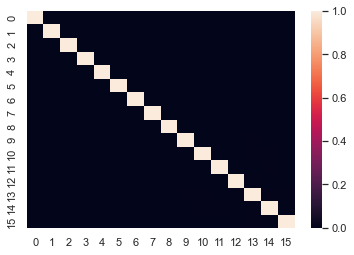

In [97]:
sns.heatmap(cormat)

In [106]:
df_test_pcainc = pca_inc.fit_transform(X_test)

In [107]:
df_test_pcainc.shape

(6306, 16)

In [103]:
Reg_PCA = LogisticRegression()

In [108]:
Churn_Model_train = Reg_PCA.fit(df_train_pcainc,y_train)

C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
Churn_Model_test = Reg_PCA.fit(df_test_pcainc,y_test)

C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
Churn_pred_train = Churn_Model.predict_proba(df_train_pcainc)
Churn_pred_test  = Churn_Model.predict_proba(df_test_pcainc)

In [113]:
metrics.roc_auc_score(y_train , Churn_pred_train[:,1])

0.5579937925818881

In [114]:
metrics.roc_auc_score(y_test , Churn_pred_test[:,1])

0.8115308309825189